In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Untuk manipulasi tanggal
from datetime import datetime


## 1. Data Loading & Inspeksi Awal

In [29]:
# Load data transjakarta 

df = pd.read_csv('Transjakarta.csv', dtype=str)
df_cleaned = df.copy()

df_cleaned

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.889,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [30]:
# Cek type data

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transID           37900 non-null  object
 1   payCardID         37900 non-null  object
 2   payCardBank       37900 non-null  object
 3   payCardName       37900 non-null  object
 4   payCardSex        37900 non-null  object
 5   payCardBirthDate  37900 non-null  object
 6   corridorID        36643 non-null  object
 7   corridorName      35970 non-null  object
 8   direction         37900 non-null  object
 9   tapInStops        36687 non-null  object
 10  tapInStopsName    37900 non-null  object
 11  tapInStopsLat     37900 non-null  object
 12  tapInStopsLon     37900 non-null  object
 13  stopStartSeq      37900 non-null  object
 14  tapInTime         37900 non-null  object
 15  tapOutStops       35611 non-null  object
 16  tapOutStopsName   36556 non-null  object
 17  tapOutStopsL

In [ ]:
# Konversi type data column datetime

df_cleaned['tapInTime'] = pd.to_datetime(df_cleaned['tapInTime'], errors='coerce')
df_cleaned['tapOutTime'] = pd.to_datetime(df_cleaned['tapOutTime'], errors='coerce')
df_cleaned['payCardBirthDate'] = pd.to_datetime(df_cleaned['payCardBirthDate'], errors='coerce')


In [ ]:
# Konversi data ke numerik (int & float)

df_cleaned['payAmount'] = pd.to_numeric(df_cleaned['payAmount'], errors='coerce')
df_cleaned['stopEndSeq'] = pd.to_numeric(df_cleaned['stopEndSeq'], errors='coerce')
df_cleaned['stopStartSeq'] = pd.to_numeric(df_cleaned['stopStartSeq'], errors='coerce')
df_cleaned['tapInStopsLon'] = pd.to_numeric(df_cleaned['tapOutStopsLon'], errors='coerce')
df_cleaned['tapOutStopsLat'] = pd.to_numeric(df_cleaned['tapOutStopsLat'], errors='coerce')
df_cleaned['tapOutStopsLon'] = pd.to_numeric(df_cleaned['tapOutStopsLon'], errors='coerce')
df_cleaned['tapInStopsLat'] = pd.to_numeric(df_cleaned['tapInStopsLat'], errors='coerce')

In [ ]:
# Cek hasil konversi type data 

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  object        
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  datetime64[ns]
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  object        
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     36556 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

In [ ]:
# Cek jumlah dan persentase missing
missing = df_cleaned.isnull().sum()
missing_pct = (missing / len(df_cleaned)) * 100
missing_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct})
missing_df[missing_df['missing_count']>0].sort_values('missing_pct', ascending=False)


,missing_count,missing_pct
tapOutStops,2289,6.039578
corridorName,1930,5.092348
tapInStopsLon,1344,3.546174
tapOutStopsLon,1344,3.546174
stopEndSeq,1344,3.546174
tapOutStopsName,1344,3.546174
tapOutStopsLat,1344,3.546174
tapOutTime,1344,3.546174
corridorID,1257,3.316623
tapInStops,1213,3.200528


In [ ]:
# Melihat data null di kolom payamount

df_cleaned['payAmount'].value_counts(dropna=False) 


payAmount
3500.0     18503
0.0        16648
20000.0     1742
NaN         1007
Name: count, dtype: int64

## 2. Data Cleaning & Preprocessing


In [ ]:
# Buat kolom umur

df_cleaned['age'] = 2023 - df_cleaned['payCardBirthDate'].dt.year

## 3. Exploratory Data Analysis (EDA)



# Behavioral pattern analysis

In [ ]:
# Hitung mode ratio: seberapa sering user pakai koridor yg sama

def mode_ratio(g, col):
    mode = g[col].mode()
    if len(mode)>0:
        return (g[col]==mode[0]).mean()
    else:
        return np.nan

ratios = df_cleaned.groupby('payCardName').apply(lambda g: mode_ratio(g, 'corridorID'))
print(ratios.describe())


count    1987.000000
mean        0.722131
std         0.344154
min         0.250000
25%         0.250000
50%         0.950000
75%         1.000000
max         1.000000
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\1936992302.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratios = df_cleaned.groupby('payCardName').apply(lambda g: mode_ratio(g, 'corridorID'))


In [ ]:
# Cek pola: apakah user konsisten naik di koridor sama

def mode_ratio(group, col):
    mode = group[col].mode()
    if len(mode)>0:
        return (group[col]==mode[0]).mean()
    else:
        return np.nan

cols_to_check = ['corridorID','corridorName','direction','tapInStops','tapOutStops']

summary = {}
for col in cols_to_check:
    ratios = df_cleaned.groupby('payCardName').apply(lambda g: mode_ratio(g, col))
    summary[col] = {
        'avg_mode_ratio': ratios.mean(),
        'median_mode_ratio': ratios.median(),
        'min': ratios.min(),
        'max': ratios.max()
    }
summary_df = pd.DataFrame(summary).T
print(summary_df)


C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\1144454667.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratios = df_cleaned.groupby('payCardName').apply(lambda g: mode_ratio(g, col))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\1144454667.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratios = df_cleaned.groupby('payCardName').apply(lambda g: mode_ratio(g, col))
C:\Users\DELL\AppData\Loca

              avg_mode_ratio  median_mode_ratio     min  max
corridorID          0.722131              0.950  0.2500  1.0
corridorName        0.712568              0.925  0.2500  1.0
direction           0.640936              0.500  0.5000  1.0
tapInStops          0.486518              0.500  0.2500  1.0
tapOutStops         0.476508              0.475  0.2375  1.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\1144454667.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratios = df_cleaned.groupby('payCardName').apply(lambda g: mode_ratio(g, col))


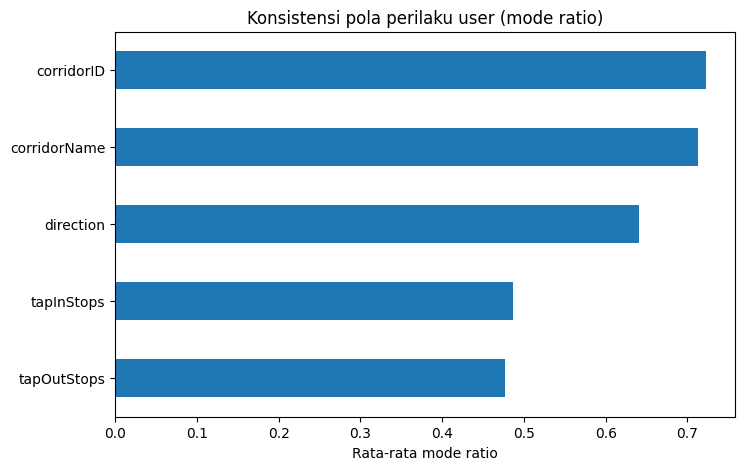

In [ ]:
# Visual: rata-rata mode ratio per kolom

summary_df['avg_mode_ratio'].sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Konsistensi pola perilaku user (mode ratio)')
plt.xlabel('Rata-rata mode ratio')
plt.show()


In [40]:
# Buat fungsi imputasi
def fill_multiple_columns(group):
    for col in ['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapInStopsLon', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']:
        common_value = group[col].mode()
        if len(common_value) > 0:
            group[col] = group[col].fillna(common_value[0])
    return group


# Terapkan dan simpan ke dataframe baru
df_cleaned = df_cleaned.groupby('payCardName').apply(fill_multiple_columns).reset_index(drop=True)
df_cleaned

C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\2768314928.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cleaned = df_cleaned.groupby('payCardName').apply(fill_multiple_columns).reset_index(drop=True)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age
0,VOXT581L3P23SI,4484508142147221,dki,Abyasa Haryanti,M,1948-01-01,JAK.07,Tanah Abang - Grogol via Tawakal,0.0,B01635P,...,20,2023-04-03 09:55:31,B02981P,Pospol Tomang 2,-6.174341,106.80489,36.0,2023-04-03 10:44:29,0.0,75
1,CKRC593R4S10HR,4484508142147221,dki,Abyasa Haryanti,M,1948-01-01,JAK.07,Tanah Abang - Grogol via Tawakal,1.0,B02607P,...,20,2023-04-03 18:19:56,B05142P,Simpang Semangka I,-6.179887,106.80590,23.0,2023-04-03 19:28:40,0.0,75
2,UJAY496F2W84VJ,4484508142147221,dki,Abyasa Haryanti,M,1948-01-01,JAK.07,Tanah Abang - Grogol via Tawakal,0.0,B01635P,...,20,2023-04-04 09:48:15,B02981P,Pospol Tomang 2,-6.174341,106.80489,36.0,2023-04-04 11:14:46,0.0,75
3,ICEF210D6F70HO,4484508142147221,dki,Abyasa Haryanti,M,1948-01-01,JAK.07,Tanah Abang - Grogol via Tawakal,1.0,B02607P,...,20,2023-04-04 19:25:51,B05142P,Simpang Semangka I,-6.179887,106.80590,23.0,2023-04-04 20:59:09,0.0,75
4,QSZJ871A6Q06TY,4484508142147221,dki,Abyasa Haryanti,M,1948-01-01,JAK.07,Tanah Abang - Grogol via Tawakal,0.0,B01635P,...,20,2023-04-05 06:11:26,B02981P,Pospol Tomang 2,-6.174341,106.80489,36.0,2023-04-05 08:08:11,0.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,UJUL696A3Y77JA,213105773866033,emoney,drg. Zamira Nurdiyanti,M,1979-01-01,13,Ciledug - Tendean,1.0,P00198,...,12,2023-04-26 17:22:35,P00034,CBD Ciledug,-6.223629,106.70904,13.0,2023-04-26 18:14:11,3500.0,44
37896,PDDM842Q6A25JZ,213105773866033,emoney,drg. Zamira Nurdiyanti,M,1979-01-01,13,Ciledug - Tendean,0.0,P00106,...,7,2023-04-27 06:14:04,P00259,Tirtayasa,-6.239207,106.80777,11.0,2023-04-27 06:39:35,3500.0,44
37897,VREJ810A1T51IV,213105773866033,emoney,drg. Zamira Nurdiyanti,M,1979-01-01,13,Ciledug - Tendean,1.0,P00198,...,12,2023-04-27 16:45:24,P00034,CBD Ciledug,-6.223629,106.70904,13.0,2023-04-27 17:53:09,3500.0,44
37898,ETHR245Y4L81NK,213105773866033,emoney,drg. Zamira Nurdiyanti,M,1979-01-01,13,Ciledug - Tendean,0.0,P00106,...,7,2023-04-28 05:00:47,P00259,Tirtayasa,-6.239207,106.80777,11.0,2023-04-28 05:54:51,3500.0,44


In [41]:
# Melihat hasil dari imputisasi, apakah masih terdapat null data

df_cleaned.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             6
corridorName          11
direction              0
tapInStops            10
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon         12
stopStartSeq           0
tapInTime              0
tapOutStops           19
tapOutStopsName       12
tapOutStopsLat        12
tapOutStopsLon        12
stopEndSeq            12
tapOutTime            12
payAmount           1007
age                    0
dtype: int64

In [42]:
# Mengahpus baris yang masih kosong, selain kolom payamount

df_cleaned = df_cleaned[df_cleaned.drop(columns='payAmount').notnull().all(axis=1)]


In [43]:
# Membuat kolom baru travel_distance

df_cleaned['travel_distance'] = (df_cleaned['stopEndSeq'] - df_cleaned['stopStartSeq']).abs()


C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\756343009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['travel_distance'] = (df_cleaned['stopEndSeq'] - df_cleaned['stopStartSeq']).abs()


In [44]:
# melihat distribusi payamount terhadap travel_distance

df_cleaned.groupby(['travel_distance', 'payAmount']).size().unstack(fill_value=0)


payAmount,0.0,3500.0,20000.0
travel_distance,,,
0.0,17,24,3
1.0,2302,3717,509
2.0,2059,2592,317
3.0,1115,1653,159
4.0,1220,1330,182
5.0,901,1310,204
6.0,602,1366,68
7.0,763,769,65
8.0,624,763,54


In [45]:
# Membuat kolom baru tapInHour

df_cleaned['tapInHour'] = df_cleaned['tapInTime'].dt.hour

C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\3511432925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tapInHour'] = df_cleaned['tapInTime'].dt.hour


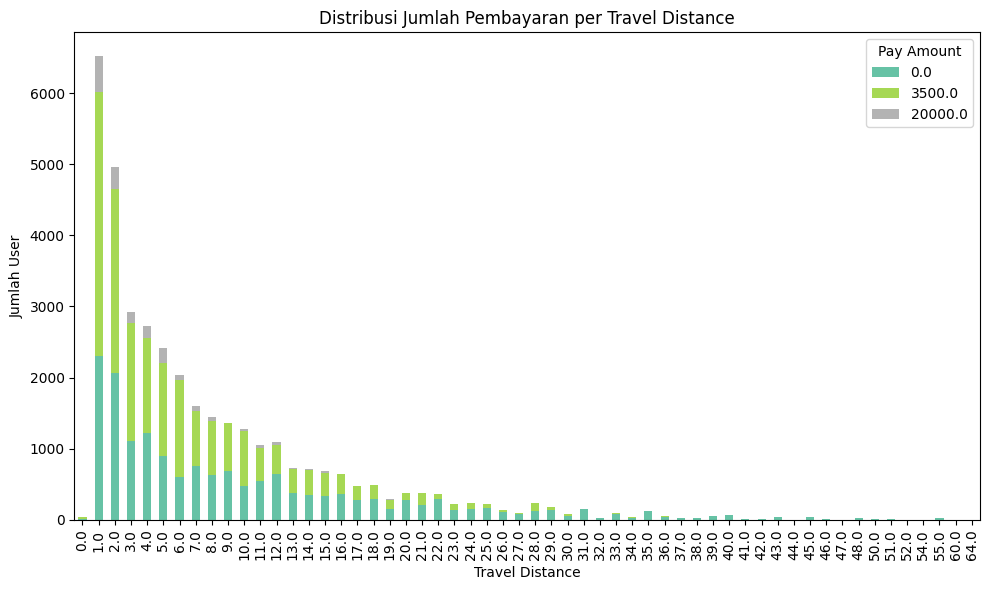

In [46]:
pay_distribution = df_cleaned.groupby(['travel_distance', 'payAmount']).size().unstack(fill_value=0)


pay_distribution.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Distribusi Jumlah Pembayaran per Travel Distance')
plt.xlabel('Travel Distance')
plt.ylabel('Jumlah User')
plt.legend(title='Pay Amount', loc='upper right')
plt.tight_layout()
plt.show()


In [47]:
# imputasi berdasarkan pola yang ada pada distribusi pembayara per travel distance

def impute_payamount(row):
    if pd.notnull(row['payAmount']):
        return row['payAmount']
    if pd.isnull(row['travel_distance']):
        return 0
    if row['travel_distance'] >= 14:
        return 20000
    elif row['travel_distance'] >= 3:
        return 3500
    else:
        return 0 

# Terapkan imputisasi ke dataframe

df_cleaned['payAmount'] = df_cleaned.apply(impute_payamount, axis=1)


C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\537506830.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['payAmount'] = df_cleaned.apply(impute_payamount, axis=1)


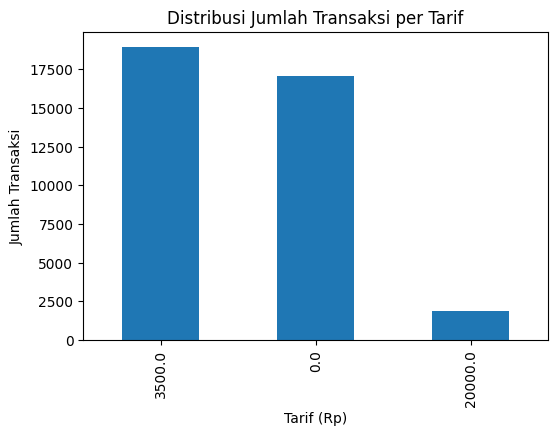

In [48]:
# Melihat distribusi transaksi per tarif

df_cleaned['payAmount'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Distribusi Jumlah Transaksi per Tarif')
plt.xlabel('Tarif (Rp)')
plt.ylabel('Jumlah Transaksi')
plt.show()

# Transaksi 0?

In [49]:
total_count = len(df_cleaned)
zero_count = (df_cleaned['payAmount'] == 0).sum()
zero_pct = zero_count / total_count * 100

print(f"Total transaksi: {total_count}")
print(f"Jumlah transaksi Rp0: {zero_count} ({zero_pct:.2f}%)")

Total transaksi: 37859
Jumlah transaksi Rp0: 17037 (45.00%)


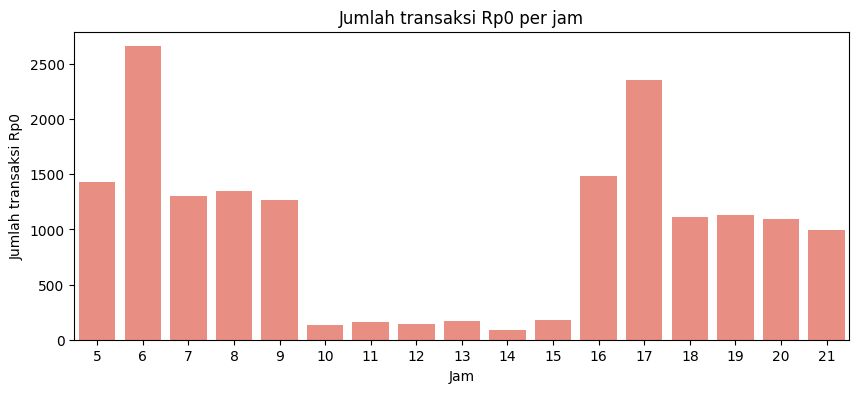

In [95]:
# Jumlah transaksi Rp0 per jam

hour_zero = df_cleaned[df_cleaned['payAmount']==0]['tapInHour'].value_counts().sort_index()

plt.figure(figsize=(10,4))
sns.barplot(x=hour_zero.index, y=hour_zero.values, color='salmon')
plt.title('Jumlah transaksi Rp0 per jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah transaksi Rp0')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\2626991734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age'] = df_cleaned['payCardBirthDate'].apply(


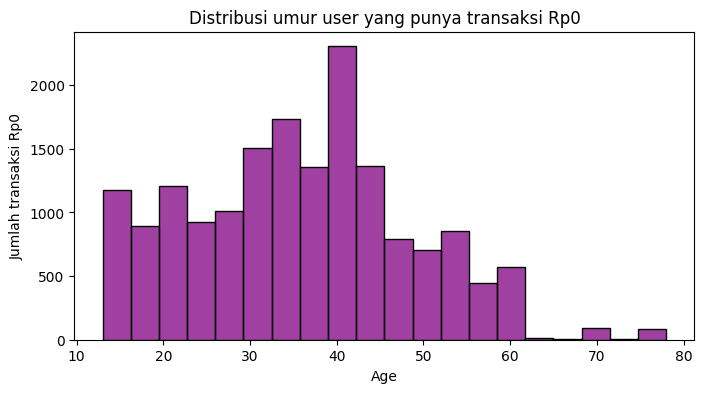

In [ ]:
# Distribusi umur user By transaksi Rp 0

df_cleaned['age'] = df_cleaned['payCardBirthDate'].apply(
    lambda d: datetime.now().year - pd.to_datetime(d, errors='coerce').year if pd.notnull(d) else None)

plt.figure(figsize=(8,4))
sns.histplot(df_cleaned[df_cleaned['payAmount']==0]['age'].dropna(), bins=20, color='purple')
plt.title('Distribusi umur user yang punya transaksi Rp0')
plt.xlabel('Age')
plt.ylabel('Jumlah transaksi Rp0')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\1738502707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['is_zero'] = (df_cleaned['payAmount']==0).astype(int)


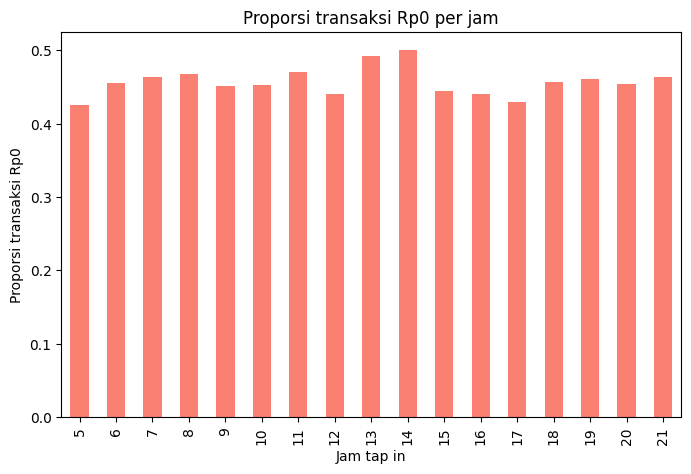

In [97]:
# Buat label transaksi Rp0 / bukan
df_cleaned['is_zero'] = (df_cleaned['payAmount']==0).astype(int)

# Hitung rata-rata share Rp0 per jam
hour_zero = df_cleaned.groupby('hour')['is_zero'].mean()

plt.figure(figsize=(8,5))
hour_zero.plot(kind='bar', color='salmon')
plt.ylabel('Proporsi transaksi Rp0')
plt.xlabel('Jam tap in')
plt.title('Proporsi transaksi Rp0 per jam')
plt.show()

# Segmentasi

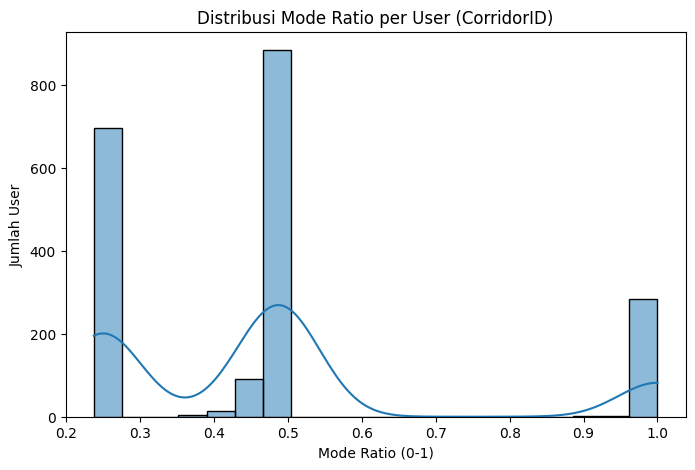

In [98]:
# Segmentasi loyal vs dinamis
df_user = pd.DataFrame({'mode_ratio': ratios})
df_user['segment'] = np.where(df_user['mode_ratio']>=0.7, 'Loyal', 'Dinamis')

# Visualisasi distribusi mode ratio/user

plt.figure(figsize=(8,5))
sns.histplot(ratios, bins=20, kde=True)
plt.title('Distribusi Mode Ratio per User (CorridorID)')
plt.xlabel('Mode Ratio (0-1)')
plt.ylabel('Jumlah User')
plt.show()



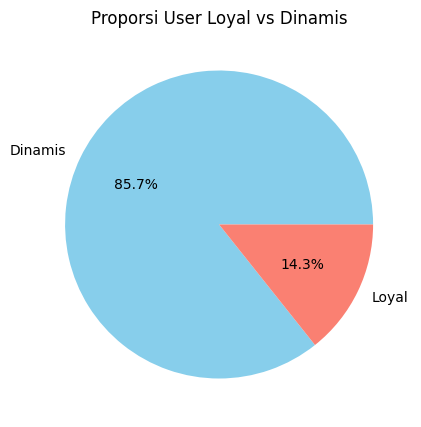

In [99]:
# Proporsi user loyal vs dinamis

seg_count = df_user['segment'].value_counts(normalize=True)
plt.figure(figsize=(5,5))
plt.pie(seg_count, labels=seg_count.index, autopct='%1.1f%%', colors=['skyblue','salmon'])
plt.title('Proporsi User Loyal vs Dinamis')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\3386788052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_user.groupby('segment')['age'].mean().index,


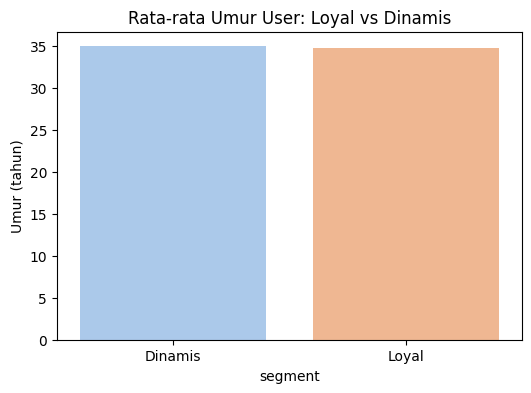

In [100]:
# Join umur
df_user = df_user.join(df_cleaned.groupby('payCardName')['age'].mean())

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(x=df_user.groupby('segment')['age'].mean().index, 
            y=df_user.groupby('segment')['age'].mean().values, palette='pastel')
plt.title('Rata-rata Umur User: Loyal vs Dinamis')
plt.ylabel('Umur (tahun)')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\1152489999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['hour'] = pd.to_datetime(df_cleaned['tapInTime']).dt.hour
C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\1152489999.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='segment', y='hour', data=df_user, palette='Set2')


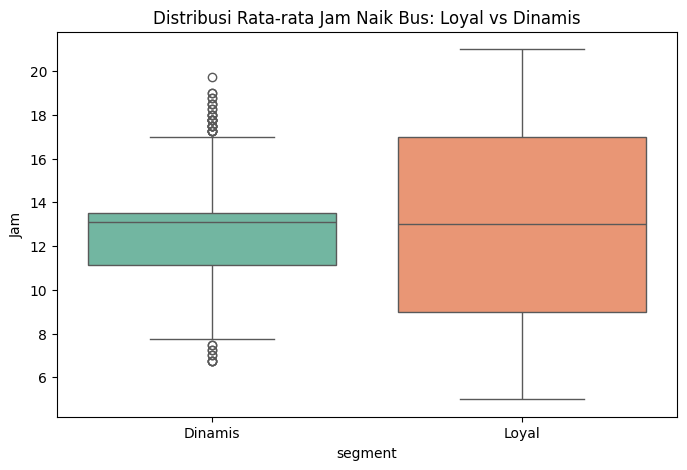

In [ ]:
# Distribusi rata-rata jam naik bus : Loyal Vs Dinamis

df_cleaned['hour'] = pd.to_datetime(df_cleaned['tapInTime']).dt.hour
avg_hour = df_cleaned.groupby('payCardName')['hour'].mean()
df_user = df_user.join(avg_hour)

plt.figure(figsize=(8,5))
sns.boxplot(x='segment', y='hour', data=df_user, palette='Set2')
plt.title('Distribusi Rata-rata Jam Naik Bus: Loyal vs Dinamis')
plt.ylabel('Jam')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\653366518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['hour'] = df_cleaned['tapInTime'].dt.hour


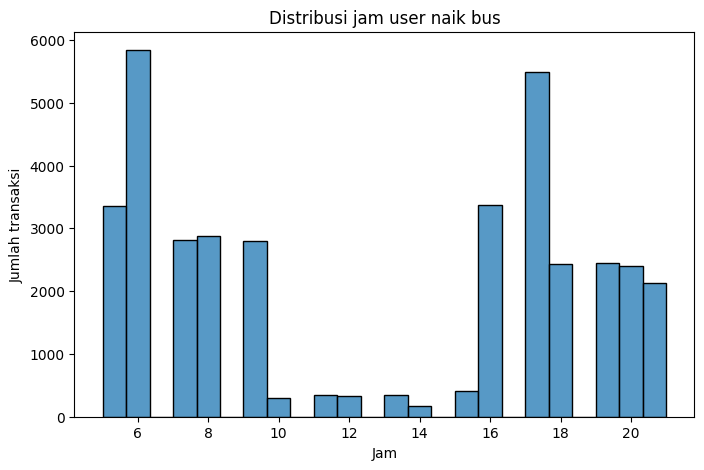

In [102]:
# Distribusi jam user naik busway

df_cleaned['hour'] = df_cleaned['tapInTime'].dt.hour

plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['tapInHour'].dropna(), bins=24, kde=False)
plt.title('Distribusi jam user naik bus')
plt.xlabel('Jam')
plt.ylabel('Jumlah transaksi')
plt.show()


In [103]:
# Pastikan kolom age sudah numeric dan tanpa NaN
df_age_clean = df_cleaned[df_cleaned['age'].notnull()].copy()

# Buat segmen umur: hanya Pelajar, Dewasa, dan Lansia
df_age_clean['age_group'] = pd.cut(
    df_age_clean['age'], 
    bins=[0, 18, 50, 100], 
    labels=['Pelajar', 'Dewasa', 'Lansia']
)

# Hitung proporsi Rp0 per segmen
prop_zero_by_group = df_age_clean.groupby('age_group')['payAmount'].apply(lambda x: (x == 0).mean())
print(prop_zero_by_group)

age_group
Pelajar    0.371604
Dewasa     0.457806
Lansia     0.481957
Name: payAmount, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\3233874806.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_zero_by_group = df_age_clean.groupby('age_group')['payAmount'].apply(lambda x: (x == 0).mean())


C:\Users\DELL\AppData\Local\Temp\ipykernel_11296\2914713223.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_df, x='age_group', y='proporsi_rp0', palette='mako')


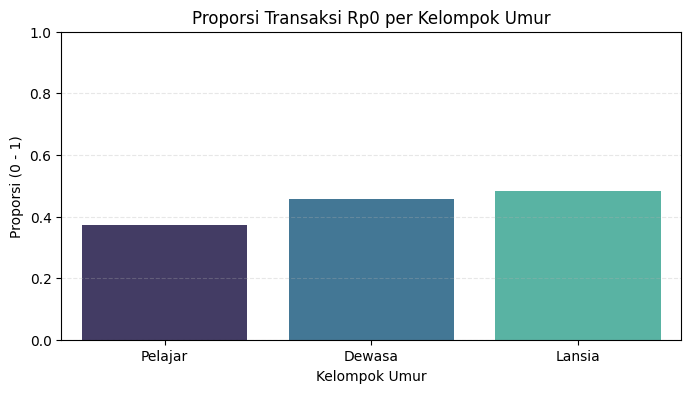

In [104]:
# Ubah jadi dataframe
prop_df = prop_zero_by_group.reset_index()
prop_df.columns = ['age_group', 'proporsi_rp0']

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=prop_df, x='age_group', y='proporsi_rp0', palette='mako')

plt.title('Proporsi Transaksi Rp0 per Kelompok Umur')
plt.ylabel('Proporsi (0 - 1)')
plt.xlabel('Kelompok Umur')
plt.ylim(0, 1)  # opsional agar proporsi jelas (0–100%)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# Simpan File ke CSV

In [105]:
# Simpan ke file CSV
df_cleaned.to_csv("df_cleaned.csv", index=False)


In [106]:
df_cleaned

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,travel_distance,tapInHour,hour,is_zero
0,VOXT581L3P23SI,4484508142147221,dki,Abyasa Haryanti,M,1948-01-01,JAK.07,Tanah Abang - Grogol via Tawakal,0.0,B01635P,...,-6.174341,106.80489,36.0,2023-04-03 10:44:29,0.0,77,16.0,9,9,1
1,CKRC593R4S10HR,4484508142147221,dki,Abyasa Haryanti,M,1948-01-01,JAK.07,Tanah Abang - Grogol via Tawakal,1.0,B02607P,...,-6.179887,106.80590,23.0,2023-04-03 19:28:40,0.0,77,3.0,18,18,1
2,UJAY496F2W84VJ,4484508142147221,dki,Abyasa Haryanti,M,1948-01-01,JAK.07,Tanah Abang - Grogol via Tawakal,0.0,B01635P,...,-6.174341,106.80489,36.0,2023-04-04 11:14:46,0.0,77,16.0,9,9,1
3,ICEF210D6F70HO,4484508142147221,dki,Abyasa Haryanti,M,1948-01-01,JAK.07,Tanah Abang - Grogol via Tawakal,1.0,B02607P,...,-6.179887,106.80590,23.0,2023-04-04 20:59:09,0.0,77,3.0,19,19,1
4,QSZJ871A6Q06TY,4484508142147221,dki,Abyasa Haryanti,M,1948-01-01,JAK.07,Tanah Abang - Grogol via Tawakal,0.0,B01635P,...,-6.174341,106.80489,36.0,2023-04-05 08:08:11,0.0,77,16.0,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,UJUL696A3Y77JA,213105773866033,emoney,drg. Zamira Nurdiyanti,M,1979-01-01,13,Ciledug - Tendean,1.0,P00198,...,-6.223629,106.70904,13.0,2023-04-26 18:14:11,3500.0,46,1.0,17,17,0
37896,PDDM842Q6A25JZ,213105773866033,emoney,drg. Zamira Nurdiyanti,M,1979-01-01,13,Ciledug - Tendean,0.0,P00106,...,-6.239207,106.80777,11.0,2023-04-27 06:39:35,3500.0,46,4.0,6,6,0
37897,VREJ810A1T51IV,213105773866033,emoney,drg. Zamira Nurdiyanti,M,1979-01-01,13,Ciledug - Tendean,1.0,P00198,...,-6.223629,106.70904,13.0,2023-04-27 17:53:09,3500.0,46,1.0,16,16,0
37898,ETHR245Y4L81NK,213105773866033,emoney,drg. Zamira Nurdiyanti,M,1979-01-01,13,Ciledug - Tendean,0.0,P00106,...,-6.239207,106.80777,11.0,2023-04-28 05:54:51,3500.0,46,4.0,5,5,0
